# 🔗 RAG with Qdrant + OpenAI + Sentence Transformers in Colab
Upload a document, embed it, store chunks in Qdrant, and ask questions using OpenAI's GPT.

In [ ]:
!pip install -q sentence-transformers qdrant-client openai tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.0 MB/s eta 0:00:00


## upload a .txt file

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
with open(filename, 'r', encoding='utf-8') as f:
    full_text = f.read()

Saving the_last_traverse.txt to the_last_traverse.txt


## Chunk the document into smaller parts

In [ ]:
# 🔹 Chunk the document into smaller parts
import textwrap
chunk_size = 500
overlap = 100

chunks = []
start = 0
while start < len(full_text):
    chunk = full_text[start:start+chunk_size]
    chunks.append(chunk)
    start += chunk_size - overlap

print(f"Chunked into {len(chunks)} parts.")

Chunked into 12 parts.


## Embed chunks using Sentence Transformers

In [ ]:
# 🔹 Embed chunks using Sentence Transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")
vectors = model.encode(chunks)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Connect to qdrant



1.   Go to https://cloud.qdrant.io
2.   Create an account (free tier is enough)
3.   Create a new cluster (select free, small, single region)
4.   Copy API Key and Cluster URL
5.   Add 'qdrant_api_key' as colab secrets. Enable Notebook Access.
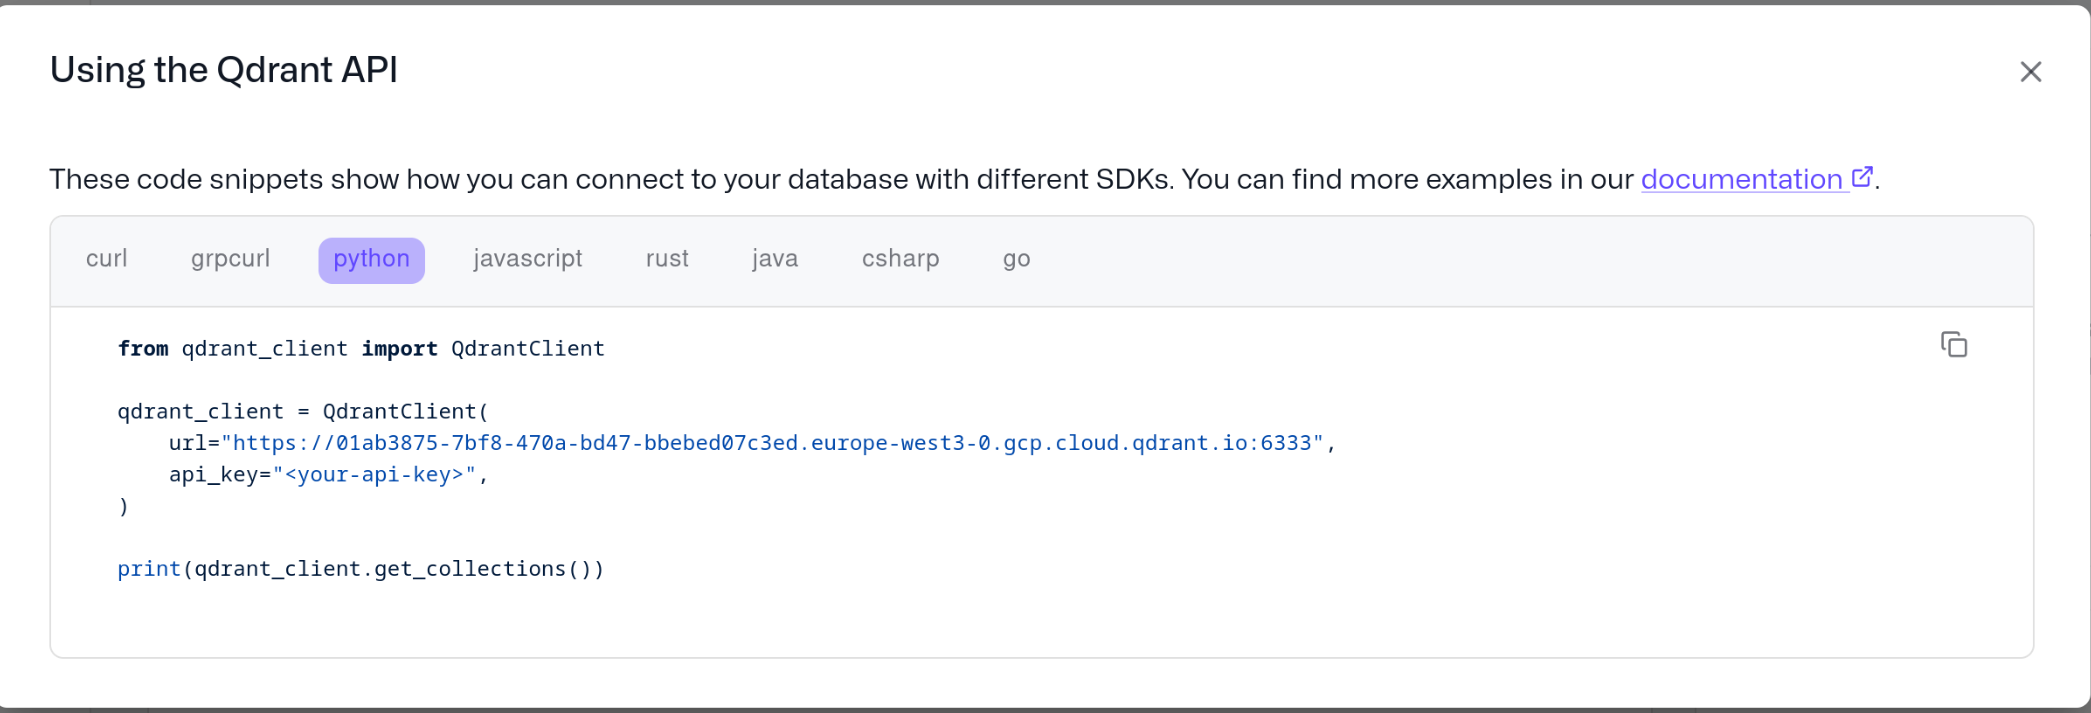






In [ ]:
from qdrant_client import QdrantClient

from google.colab import userdata

qdrant_client = QdrantClient(
    url="https://01ab3875-7bf8-470a-bd47-bbebed07c3ed.europe-west3-0.gcp.cloud.qdrant.io:6333", # Replace this
    api_key=userdata.get('qdrant_api_key')
)

print(qdrant_client.get_collections())

collections=[CollectionDescription(name='rag_collection')]


# Vector Database
1. Create Collection
2. upload the vectors into the collection

In [ ]:
# 🔹 Connect to Qdrant Cloud
from qdrant_client import QdrantClient
from qdrant_client.models import VectorParams, Distance

from google.colab import userdata


url = "https://01ab3875-7bf8-470a-bd47-bbebed07c3ed.europe-west3-0.gcp.cloud.qdrant.io:6333"  # Replace this
api_key = userdata.get('qdrant_api_key')  # Replace this

client = QdrantClient(url=url, api_key=api_key)
client.recreate_collection(
    collection_name="rag_collection",
    vectors_config=VectorParams(size=384, distance=Distance.COSINE)
)

client.upsert(
    collection_name="rag_collection",
    points=[
        {"id": i, "vector": vectors[i].tolist(), "payload": {"text": chunks[i]}}
        for i in range(len(chunks))
    ]
)

/tmp/ipython-input-9-1810451495.py:12: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(


UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

# Setup OpenAI

In [ ]:
# 🔹 Enter your OpenAI key
import openai
openai.api_key = userdata.get('openai_api_key')  # Replace this

## your query goes here

In [ ]:
# 🔹 Ask a question and search relevant chunks
# question = "Who are the characters of the story?"
# question = "What is the title of the story?"
question = "Do you know Eliana Ryker?"

query_vec = model.encode([question])[0].tolist()

results = client.search(
    collection_name="rag_collection",
    query_vector=query_vec,
    limit=7 # number of chunks
)

context = "---".join([r.payload['text'] for r in results])

# 🔹 Send to OpenAI LLM (Improved version)


response1 = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {
            "role": "system",
            "content": (
                "You are a concise, factual, and context-aware assistant. "
                "Your job is to answer user questions based solely on the provided context. "
                "If the context does not contain enough information, clearly state that. "
                "Do not invent information or rely on outside knowledge. "
                "Respond in a helpful, non-repetitive, and reader-friendly tone."
            )
        },
        {
            "role": "user",
            "content": f"""Question: {question}"""
        }
    ]
)

response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {
            "role": "system",
            "content": (
                "You are a concise, factual, and context-aware assistant. "
                "Your job is to answer user questions based solely on the provided context. "
                "If the context does not contain enough information, clearly state that. "
                "Do not invent information or rely on outside knowledge. "
                "Respond in a helpful, non-repetitive, and reader-friendly tone."
            )
        },
        {
            "role": "user",
            "content": f"""Context:{context}
                           Question: {question}"""
        }
    ]
)



print("\n\n","*"*80,"\n\nQuestion:\n")

print(question)

print("\n\n","*"*80,"\n\nAnswer without RAG:\n")

print(response1.choices[0].message.content)


print("\n\n","*"*80,"\n\nAnswer with RAG:\n")

print(response.choices[0].message.content)


# print("*"*80)
# print("*"*80)
# print("*"*80)

# print("\n\n","*"*80,"\n\nRetrieved chunks")

# print(context)


/tmp/ipython-input-19-3304412302.py:8: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  results = client.search(




 ******************************************************************************** 

Question:

Do you know Eliana Ryker?


 ******************************************************************************** 

Answer without RAG:

I'm sorry, but based on the given context, there is no information about Eliana Ryker. If you can provide more details or a specific question about Eliana Ryker, I'll be happy to help.


 ******************************************************************************** 

Answer with RAG:

Yes, based on the provided context, Eliana Ryker is a 21-year-old brilliant and reclusive coder who plays a key role in a complex sci-fi narrative involving time travel, artificial beings, and rewriting reality. She is faced with crucial decisions that impact the fate of billions of lives and the course of history.
